In [10]:
#Importing All The Required Libraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [11]:
#Loading Datasets
pd.set_option('display.max_columns',10,'display.width',1000)
df=pd.read_csv(r"C:\Users\USER\Downloads\train.csv")
test=pd.read_csv(r"C:\Users\USER\Downloads\test.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,...,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,...,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,...,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,...,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,...,0,373450,8.0500,NaN,S


In [12]:
# Data Exploration (consider adding more visualizations and insights)
print(df.head())
print(df.info())
print(df.describe())

   PassengerId  Survived  Pclass                                               Name     Sex  ...  Parch            Ticket     Fare Cabin  Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male  ...      0         A/5 21171   7.2500   NaN         S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  ...      0          PC 17599  71.2833   C85         C
2            3         1       3                             Heikkinen, Miss. Laina  female  ...      0  STON/O2. 3101282   7.9250   NaN         S
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  ...      0            113803  53.1000  C123         S
4            5         0       3                           Allen, Mr. William Henry    male  ...      0            373450   8.0500   NaN         S

[5 rows x 12 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 

In [13]:
# Check for missing values
print(df.isnull().sum())

# Fill missing Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Drop Cabin column due to too many missing values
df.drop('Cabin', axis=1, inplace=True)

# Fill missing Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [14]:
# Convert Sex to numerical values
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Convert Embarked to numerical values
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})


In [15]:
#Drop Unnecessary Columns
df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [16]:
#Descriptive Statistics
print(df.describe())

         Survived      Pclass         Sex         Age       SibSp       Parch        Fare    Embarked
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642    0.352413   29.361582    0.523008    0.381594   32.204208    1.536476
std      0.486592    0.836071    0.477990   13.019697    1.102743    0.806057   49.693429    0.791503
min      0.000000    1.000000    0.000000    0.420000    0.000000    0.000000    0.000000    0.000000
25%      0.000000    2.000000    0.000000   22.000000    0.000000    0.000000    7.910400    1.000000
50%      0.000000    3.000000    0.000000   28.000000    0.000000    0.000000   14.454200    2.000000
75%      1.000000    3.000000    1.000000   35.000000    1.000000    0.000000   31.000000    2.000000
max      1.000000    3.000000    1.000000   80.000000    8.000000    6.000000  512.329200    2.000000


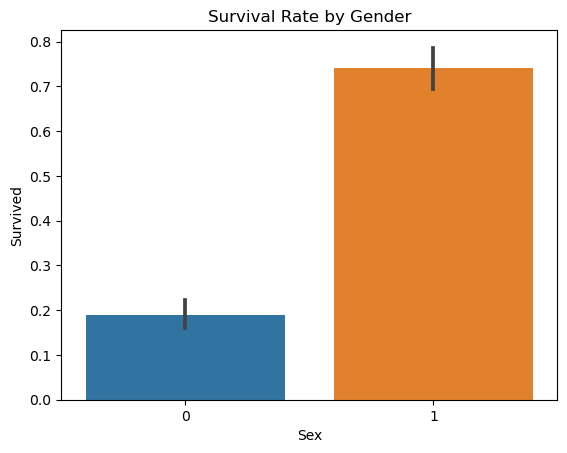

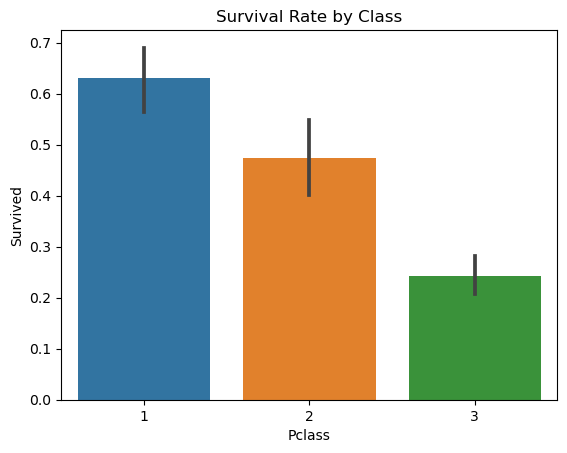

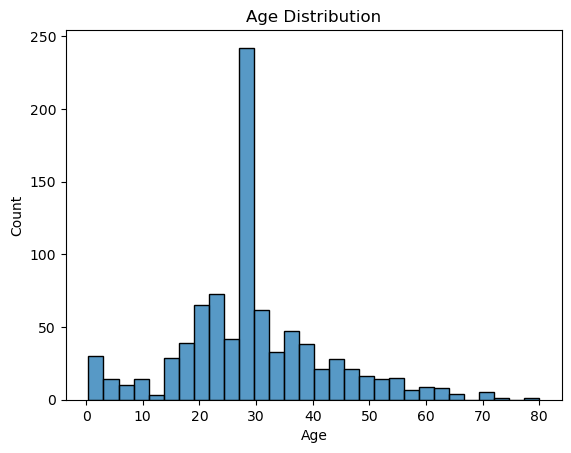

In [17]:
#Visualize Survival Rate
import seaborn as sns
import matplotlib.pyplot as plt

# Survival rate based on gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

# Survival rate based on class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Class')
plt.show()

# Age distribution
sns.histplot(df['Age'], bins=30)
plt.title('Age Distribution')
plt.show()


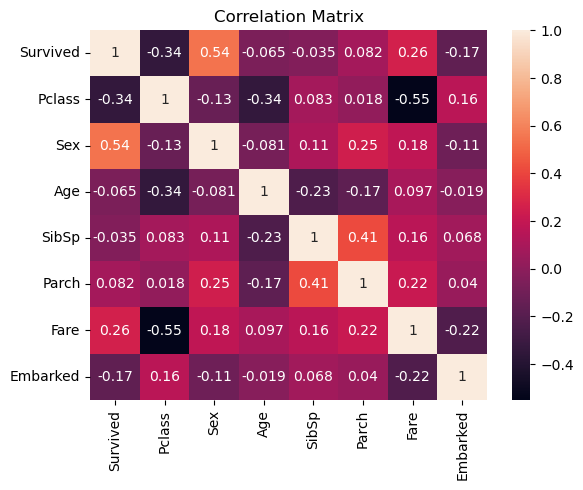

In [18]:
#Correlation Matrix
correlation = df.corr()
sns.heatmap(correlation, annot=True)
plt.title('Correlation Matrix')
plt.show()


In [19]:
#Classifiers
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
#Train and Evaluate Different Classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier()
}

In [22]:
#Checking Scores And Algorithms

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print(f"{name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n")

Logistic Regression:
Accuracy: 0.8100558659217877
Confusion Matrix:
[[90 15]
 [19 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



K-Neighbors Classifier:
Accuracy: 0.7206703910614525
Confusion Matrix:
[[89 16]
 [34 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.85      0.78       105
           1       0.71      0.54      0.62        74

    accuracy                           0.72       179
   macro avg       0.72      0.69      0.70       179
weighted avg       0.72      0.72      0.71       179



Gaussian Naive Bayes:
Accuracy: 0.776536312849162
Confusion Matrix:
[[82 23]
 [17 57]]
Classification Report:
         